In [2]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
# import seaborn as sns
from numpy import sort
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import random
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
data_path = "F:\\Users\\ivann_000\\AnacondaProjects\\MLBootcamp4\\data"
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]
XX = pd.DataFrame(preprocessing.minmax_scale(X, (0,1)))
# XX['class'] = y

In [4]:
# XX["x0_strange"] = (XX[0] > 0.99)*1
# XX.loc[XX[0] > 0.99, 0] = 0.99

In [5]:
cols = []
corr = X.corr()
for i in corr:
    for j in corr:
        if ((corr[i][j] > 0.95) and (i!=j) and (i<j)):
            cols.append([i,j])

In [12]:
for c in cols:
    XX["{0}_{1}".format(str(c[0]),str(c[1]))] = XX[c[0]] - XX[c[1]]

In [13]:
columns = XX.columns
XX = pd.DataFrame(preprocessing.minmax_scale(XX, (0,1)))
XX.columns = columns

In [8]:
len(XX.columns)

425

Feature ranking:
1. feature 11 (0.039099)
2. feature 158 (0.036352)
3. feature 193 (0.023875)
4. feature 208 (0.014182)
5. feature 87 (0.013710)
6. feature 0 (0.010967)
7. feature 23 (0.010349)
8. feature 291 (0.007479)
9. feature 138 (0.006499)
10. feature 51 (0.006302)
11. feature 279 (0.006196)
12. feature 82 (0.005858)
13. feature 12 (0.005424)
14. feature 120 (0.005334)
15. feature 156 (0.005196)
16. feature 157 (0.004889)
17. feature 337 (0.004704)
18. feature 366 (0.004470)
19. feature 140 (0.004326)
20. feature 344 (0.004277)
21. feature 324 (0.004258)
22. feature 35 (0.004248)
23. feature 222 (0.004183)
24. feature 276 (0.004037)
25. feature 233 (0.004000)
26. feature 96 (0.003989)
27. feature 54 (0.003898)
28. feature 3 (0.003790)
29. feature 278 (0.003750)
30. feature 309 (0.003736)
31. feature 416 (0.003651)
32. feature 70 (0.003631)
33. feature 151 (0.003586)
34. feature 264 (0.003535)
35. feature 341 (0.003524)
36. feature 391 (0.003467)
37. feature 196 (0.003450)
38. fea

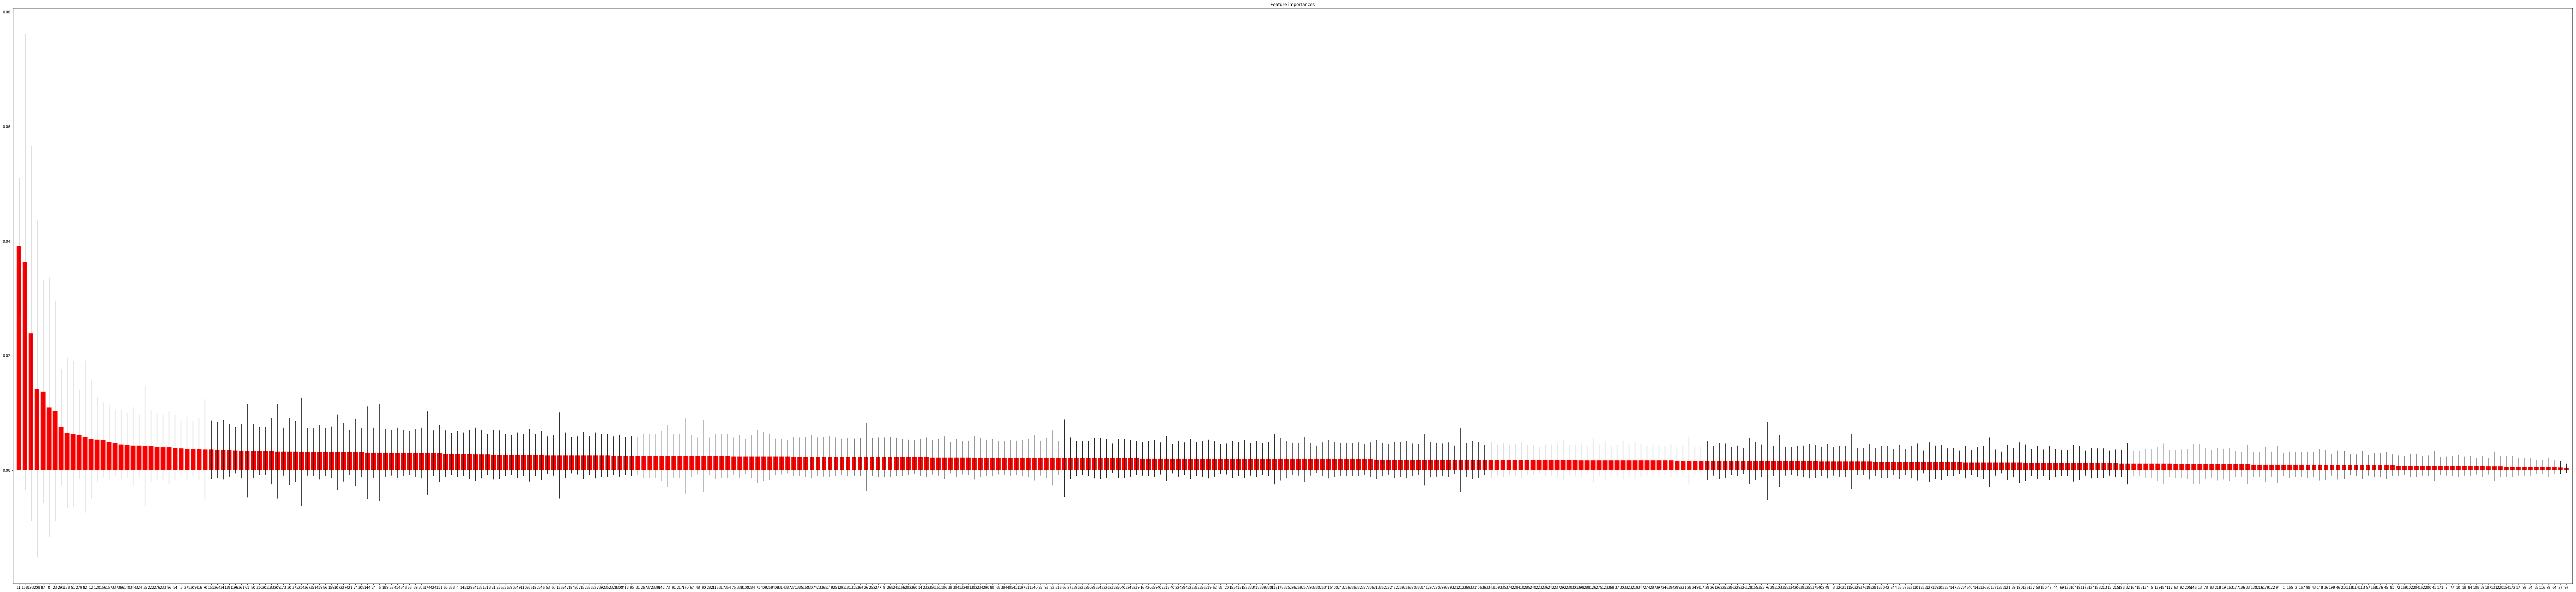

In [8]:
model = RandomForestClassifier(n_estimators=400,
                               n_jobs=4,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced")
model.fit(XX, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(XX.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(XX.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(XX.shape[1]), indices)
plt.xlim([-1, XX.shape[1]])
plt.show()



# cross_val_score(model, XX, y, scoring='accuracy', cv=3).mean()

In [14]:
arr = XX.shape[1]
for f in range(arr):
    if importances[indices[f]] < 0.0021:
        XX = XX.drop([indices[f]], axis=1)


In [15]:
len(XX.columns)

173

In [16]:
model = RandomForestClassifier(n_estimators=400,
                               n_jobs=8,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced")
cross_val_score(model, XX, y, scoring='accuracy', cv=3).mean()

0.5457057993020592

In [17]:
model = RandomForestClassifier(n_estimators=1500,
                               n_jobs=8,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced")
cross_val_score(model, XX, y, scoring='accuracy', cv=3).mean()

0.5554512196204836

In [14]:
XX.columns[291]

291